In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
source_file_taxi_train = 'train.csv'

In [231]:
df = pd.read_csv(source_file_taxi_train)
df.set_index(['id'],inplace=True)
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'],axis=1, inplace=True)
# df.info()

In [254]:
df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
# если заменить дни недели на строковое обозначение, в дальшейшем в HeatMap непонятно, как сделать сортировку.
df['day_of_week'] = pd.to_datetime(df['pickup_datetime']).dt.weekday #.map({0:"Mo",1:"Tu",2:"We",3:"Th",4:"Fr",5:"Sa",6:"Su"})
df['date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,hour,day_of_week,trip_duration_minutes,date
id,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,455,17,0,13,2016-03-14
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,663,0,6,18,2016-06-12
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,2124,11,1,59,2016-01-19
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,429,19,2,12,2016-04-06
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,435,13,5,12,2016-03-26
...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,778,13,4,22,2016-04-08
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,655,7,6,18,2016-01-10
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,764,6,4,21,2016-04-22


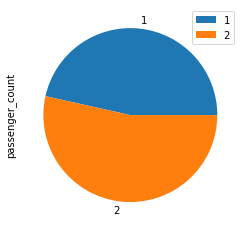

In [253]:
df_vendor = df.groupby(['vendor_id']).count()
df_vendor.plot(kind='pie',y='passenger_count')
#Количество перевозок каждого провайдера за весь период доступных данных
#рынок перевозор провайдеры делял примерно поровну

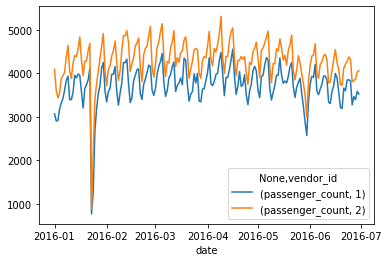

In [265]:
df_date = df[['date','vendor_id','passenger_count']]
df_date = df_date.groupby(['date','vendor_id']).count()
df_date.unstack('vendor_id').plot()
#Количество перевозок каждого провайдера по дням
#после апреля правное снижение количества заказов

In [234]:
df.groupby(['passenger_count']).count()

,vendor_id,pickup_datetime,dropoff_datetime,trip_duration,hour,day_of_week
passenger_count,,,,,,
0,60,60,60,60,60,60
1,1033540,1033540,1033540,1033540,1033540,1033540
2,210318,210318,210318,210318,210318,210318
3,59896,59896,59896,59896,59896,59896
4,28404,28404,28404,28404,28404,28404
5,78088,78088,78088,78088,78088,78088
6,48333,48333,48333,48333,48333,48333
7,3,3,3,3,3,3
8,1,1,1,1,1,1


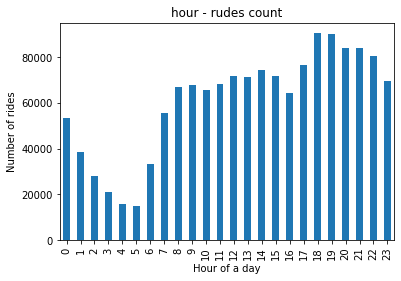

In [235]:
df_hour_count = df['hour'].value_counts().sort_index()
plt.xlabel('Hour of a day')
plt.ylabel('Number of rides')
plt.title('hour - rudes count')
df_hour_count.plot(kind='bar')
#количество заказов в зависимости от времени суток
#4-5 утра - минимальное количество заказов
#18-19 - максимальное количество заказов

In [236]:
df['trip_duration_minutes'] = round(df['trip_duration']/36).map(int)
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,hour,day_of_week,trip_duration_minutes
id,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,455,17,0,13
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,663,0,6,18
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,2124,11,1,59
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,429,19,2,12
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,435,13,5,12
...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,778,13,4,22
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,655,7,6,18
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,764,6,4,21


In [238]:
df_wdd = df[['day_of_week','trip_duration_minutes','hour']]
df_wdd.set_index(['day_of_week'],inplace=True)
#df_wdd_dynamics = df_wdd.groupby(['day_of_week', 'Hour']).mean()
df_wdd_dynamics= df.pivot_table(index='day_of_week',columns='hour',values='trip_duration_minutes')

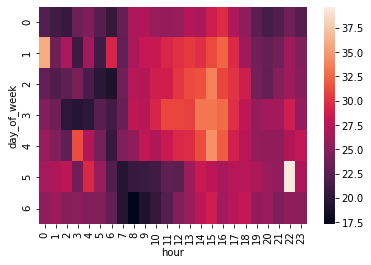

In [239]:
sns.heatmap(df_wdd_dynamics)
# длительность поездки в минутах в зависимости от дня недели и времени суток
# концетрация длительных по времени поездок в четверг около 15 часов дня. Скорее всего из-за пробок.
# в воскресерье в 8 утра самые которкие по времени поездки

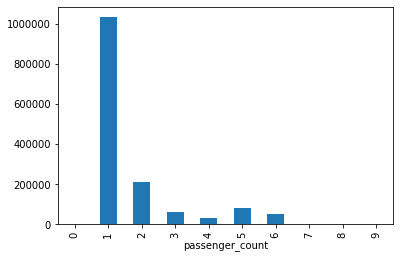

In [275]:
df_pass = df.groupby("passenger_count").count()
df_pass = df_pass['vendor_id']
df_pass.plot(kind='bar')
#намного чаще всего едет один пассажир, 
# но поездок с 5ю и 6ю пассажирами больше, чем с 4мя